<a href="https://colab.research.google.com/github/JohnNun/pneumonia_identification_project/blob/main/pneumonia_identification_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pneumonia Identification Project

# Business and Data Understanding


# Data preparation

In [ ]:
# For Google Colab only
!pip install keras
!pip install keras_preprocessing
!pip install tensorflow
!pip install scikeras[tensorflow]

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 1.5 MB/s eta 0:00:00


In [ ]:
from tensorflow import keras
from keras_preprocessing.image import ImageDataGenerator
from keras_preprocessing.image import array_to_img, img_to_array, load_img
from sklearn.model_selection import train_test_split
import numpy as np
import os

In [ ]:
# Following code taken from stackoverflow user fdsig
import json
import os
from pathlib import Path

# your api key
api_key = {
'username':"" ,
'key':""}

# uses pathlib Path
kaggle_path = Path('/root/.kaggle')
os.makedirs(kaggle_path, exist_ok=True)

# opens file and dumps python dict to json object
with open (kaggle_path/'kaggle.json', 'w') as handl:
    json.dump(api_key,handl)

os.chmod(kaggle_path/'kaggle.json', 600)

In [ ]:
# Downloading and Importing images
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia
!unzip chest-xray-pneumonia

Streaming output truncated to the last 5000 lines.
  inflating: chest_xray/train/NORMAL/IM-0435-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0435-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001-0002.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0438-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001-0002.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0440-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0441-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0442-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0444-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0445-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0446-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0447-0001.jpeg  
  inflating:

In [ ]:
# Linking directory path
train_data_dir = 'chest_xray/train'
val_data_dir = 'chest_xray/val'

In [ ]:
# Getting train and validation data from directory
val_generator = ImageDataGenerator().flow_from_directory(val_data_dir, target_size=(64,64), batch_size=16, seed=42)
train_generator = ImageDataGenerator().flow_from_directory(train_data_dir, target_size=(64,64), batch_size=652, seed=42)

Found 16 images belonging to 2 classes.
Found 5216 images belonging to 2 classes.


In [ ]:
# Creating datasets
train_images, train_labels = next(train_generator)
val_images, val_labels = next(val_generator)

In [ ]:
print(np.shape(train_images))
print(np.shape(train_labels))
print(np.shape(val_images))
print(np.shape(val_labels))

(652, 64, 64, 3)
(652, 2)
(16, 64, 64, 3)
(16, 2)


In [ ]:
# Reshaping data
train_img_unrow = train_images.reshape(652, -1)
val_img_unrow = val_images.reshape(16, -1)

In [ ]:
print(np.shape(train_img_unrow))
print(np.shape(val_img_unrow))

(652, 12288)
(16, 12288)


In [ ]:
# Normalizing data
train_img_final = train_img_unrow/255
val_img_final = val_img_unrow/255

# Modeling

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import seaborn as sns

import tensorflow as tf
from tensorflow.keras import layers, models, regularizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l1, l2
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from scikeras.wrappers import KerasClassifier

In [ ]:
# Function to quickly plot model results
def plot_results(model_results):
    """
    This function will take in the results of a model and plot the loss and accuracy of the model.

    Args:
    model_results (list): the results of the model in [] brackets.
    """
    for results in model_results:
        train_loss = results.history['loss']
        train_acc = results.history['accuracy']
        val_loss = results.history['val_loss']
        val_acc = results.history['val_accuracy']

        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
        sns.lineplot(x=results.epoch, y=train_loss, ax=ax1, label='train_loss')
        sns.lineplot(x=results.epoch, y=train_acc, ax=ax2, label='train_accuracy')

        sns.lineplot(x=results.epoch, y=val_loss, ax=ax1, label='val_loss')
        sns.lineplot(x=results.epoch, y=val_acc, ax=ax2, label='val_accuracy')
        ax1.set_title('Loss')
        ax2.set_title('Accuracy')
        ax1.legend();

In [ ]:
model_1 = Sequential()

In [ ]:
model_1.add(layers.Input(shape=(12288,)))
model_1.add(Dense(50, activation='relu'))
model_1.add(Dense(25, activation='relu'))
model_1.add(Dense(10, activation='relu'))
model_1.add(Dense(2, activation='softmax'))

In [ ]:
model_1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model_1_results = model_1.fit(train_img_final, train_labels, epochs=10, batch_size=100, validation_data=(val_img_final, val_labels))

Epoch 1/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 253ms/step - accuracy: 0.7244 - loss: 1.5438 - val_accuracy: 0.5000 - val_loss: 0.7570
Epoch 2/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7242 - loss: 0.5485 - val_accuracy: 0.5000 - val_loss: 0.7229
Epoch 3/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7397 - loss: 0.4912 - val_accuracy: 0.5000 - val_loss: 0.8064
Epoch 4/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7549 - loss: 0.4508 - val_accuracy: 0.5625 - val_loss: 0.7643
Epoch 5/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7856 - loss: 0.3919 - val_accuracy: 0.6875 - val_loss: 0.6148
Epoch 6/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8456 - loss: 0.3477 - val_accuracy: 0.6875 - val_loss: 0.6198
Epoch 7/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8718 - loss: 0.3315 - val_accuracy: 0.6875 - val_loss: 0.6466
Epoch 8/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9021 - loss: 0.2839 - val_accuracy: 0.6875 - val_loss: 0.6721

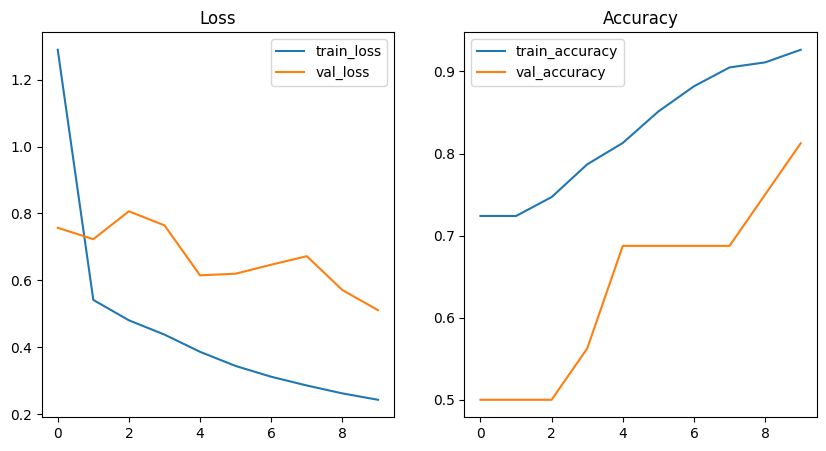

In [ ]:
plot_results([model_1_results])

In [ ]:
model_2 = Sequential()

In [ ]:
model_2.add(layers.Input(shape=(12288,)))
model_2.add(Dense(50, activation='relu'))
model_2.add(Dense(25, activation='relu'))
model_2.add(Dropout(0.5))
model_2.add(Dense(10, activation='relu', kernel_regularizer=l2))
model_2.add(Dense(2, activation='softmax'))

In [ ]:
model_2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model_2_results = model_2.fit(train_img_final, train_labels, epochs=50, batch_size=250, validation_data=(val_img_final, val_labels))

Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 879ms/step - accuracy: 0.7264 - loss: 1.1696 - val_accuracy: 0.5000 - val_loss: 0.8722
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.7201 - loss: 0.9218 - val_accuracy: 0.5000 - val_loss: 0.9159
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.7108 - loss: 0.8518 - val_accuracy: 0.5000 - val_loss: 0.9372
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.7217 - loss: 0.8403 - val_accuracy: 0.5000 - val_loss: 0.8664
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.7086 - loss: 0.8078 - val_accuracy: 0.5000 - val_loss: 0.8788
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.6944 - loss: 0.8316 - val_accuracy: 0.5000 - val_loss: 0.8449
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.7211 - loss: 0.7678 - val_accuracy: 0.5000 - val_loss: 0.8557
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.7219 - loss: 0.7582 - val_accuracy: 0.5000 - val_loss: 0.8580

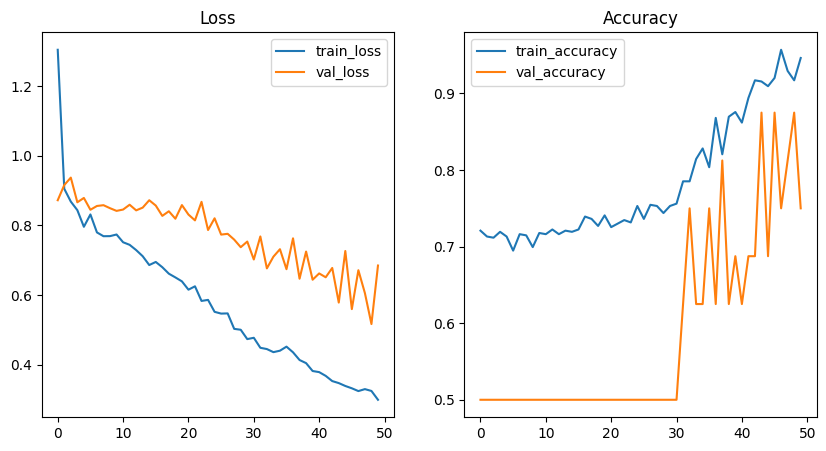

In [ ]:
plot_results([model_2_results])

In [ ]:
model_3 = Sequential()

In [ ]:
model_3.add(layers.Input(shape=(12288,)))
model_3.add(Dense(50, activation='relu'))
model_3.add(Dense(50, activation='relu', kernel_regularizer=l2))
model_3.add(Dropout(0.5))
model_3.add(Dense(25, activation='relu'))
model_3.add(Dense(25, activation='relu', kernel_regularizer=l2(l2=0.25)))
model_3.add(Dropout(0.2))
model_3.add(Dense(10, activation='relu'))
model_3.add(Dense(2, activation='softmax'))

In [ ]:
model_3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [ ]:
model_3_results = model_3.fit(train_img_final, train_labels, epochs=100, batch_size=500, validation_data=(val_img_final, val_labels), callbacks=[early_stop])

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 7s 3s/step - accuracy: 0.4467 - loss: 7.4357 - val_accuracy: 0.5000 - val_loss: 7.7163
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.6511 - loss: 7.4252 - val_accuracy: 0.5000 - val_loss: 7.1726
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - accuracy: 0.6031 - loss: 7.2465 - val_accuracy: 0.5000 - val_loss: 7.0812
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.5808 - loss: 7.0847 - val_accuracy: 0.5000 - val_loss: 6.9848
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - accuracy: 0.6147 - loss: 6.9729 - val_accuracy: 0.5000 - val_loss: 6.8847
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - accuracy: 0.6285 - loss: 6.8420 - val_accuracy: 0.5000 - val_loss: 6.7683
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.6099 - loss: 6.7599 - val_accuracy: 0.5000 - val_loss: 6.6579
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 0.6432 - loss: 6.6145 - val_accuracy: 0.5000 - val_loss: 6

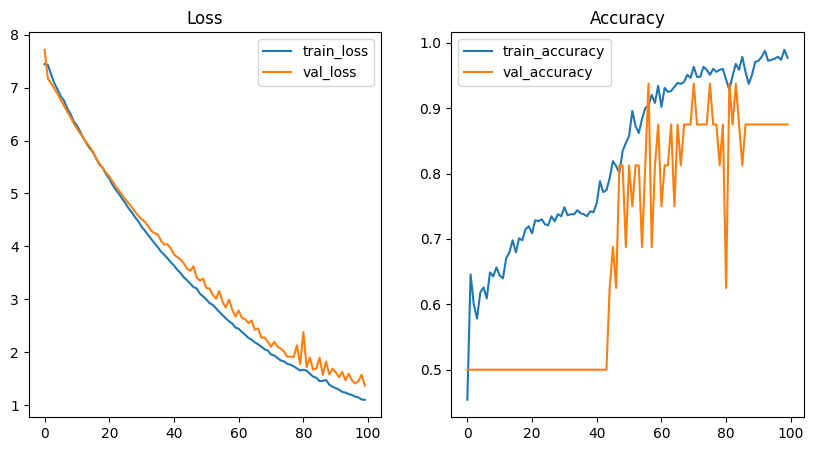

In [ ]:
plot_results([model_3_results])

In [ ]:
model_4 = Sequential()

In [ ]:
model_4.add(layers.Input(shape=(12288,)))
model_4.add(Dense(75, activation='relu'))
model_4.add(Dense(50, activation='relu'))
model_4.add(Dropout(0.5))
model_4.add(Dense(50, activation='relu', kernel_regularizer=l2(l2=0.5)))
model_4.add(Dense(25, activation='relu'))
model_4.add(Dropout(0.25))
model_4.add(Dense(25, activation='relu', kernel_regularizer=l2(l2=0.25)))
model_4.add(Dense(10, activation='relu', kernel_regularizer=l2(l2=0.01)))
model_4.add(Dense(2, activation='softmax'))

In [ ]:
model_4.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model_4_results = model_4.fit(train_img_final, train_labels, epochs=100, batch_size=250, validation_data=(val_img_final, val_labels), callbacks=[early_stop])

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 9s 2s/step - accuracy: 0.4267 - loss: 32.0308 - val_accuracy: 0.5000 - val_loss: 31.4055
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.6615 - loss: 30.9612 - val_accuracy: 0.5000 - val_loss: 30.2439
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.6643 - loss: 29.8752 - val_accuracy: 0.5000 - val_loss: 29.1403
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.6774 - loss: 28.8380 - val_accuracy: 0.5000 - val_loss: 28.1369
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.6740 - loss: 27.8476 - val_accuracy: 0.5000 - val_loss: 27.1824
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.6944 - loss: 26.8638 - val_accuracy: 0.5000 - val_loss: 26.2833
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.7242 - loss: 25.9556 - val_accuracy: 0.5000 - val_loss: 25.3643
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.7214 - loss: 25.0343 - val_accuracy: 0.500

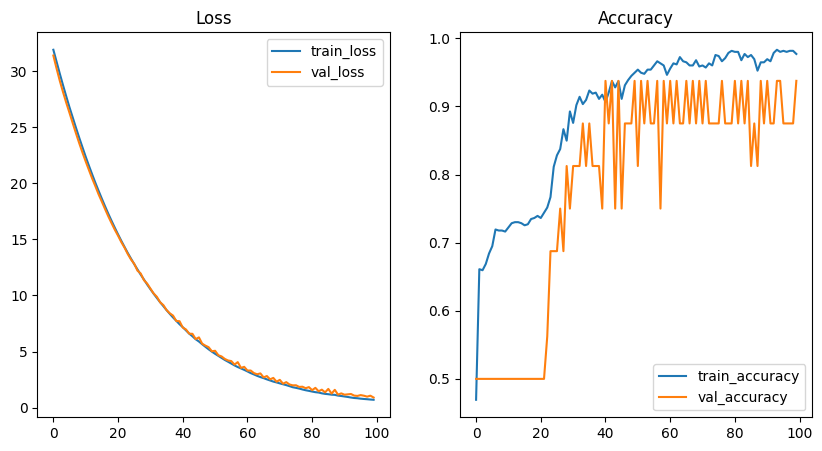

In [ ]:
plot_results([model_4_results])

In [ ]:
model_5 = models.Sequential()

In [ ]:
model_5.add(layers.Input(shape=(64, 64, 3)))
model_5.add(layers.Conv2D(32, (3, 3), activation='relu'))
model_5.add(layers.BatchNormalization())
model_5.add(layers.Activation('relu'))
model_5.add(layers.MaxPooling2D())

model_5.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_5.add(layers.BatchNormalization())
model_5.add(layers.Activation('relu'))
model_5.add(layers.MaxPooling2D())

model_5.add(layers.Conv2D(128, (3, 3), activation='relu'))
model_5.add(layers.BatchNormalization())
model_5.add(layers.Activation('relu'))
model_5.add(layers.MaxPooling2D())

model_5.add(layers.Flatten())
model_5.add(layers.Dense(64, activation='relu'))
model_5.add(layers.BatchNormalization())
model_5.add(layers.Activation('relu'))

model_5.add(layers.Dense(32, activation='relu'))
model_5.add(layers.BatchNormalization())
model_5.add(layers.Activation('relu'))

model_5.add(layers.Dense(2, activation='softmax'))

In [ ]:
model_5.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model_5_results = model_5.fit(train_images, train_labels, epochs=10, batch_size=300, validation_data=(val_images, val_labels))

Epoch 1/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.6956 - loss: 0.7546 - val_accuracy: 0.5000 - val_loss: 12.3859
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.9121 - loss: 0.3151 - val_accuracy: 0.5000 - val_loss: 17.7282
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.9475 - loss: 0.2458 - val_accuracy: 0.5000 - val_loss: 18.3142
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.9648 - loss: 0.1825 - val_accuracy: 0.5000 - val_loss: 17.6998
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.9832 - loss: 0.1447 - val_accuracy: 0.5000 - val_loss: 17.2090
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.9857 - loss: 0.1120 - val_accuracy: 0.5000 - val_loss: 16.0549
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.9913 - loss: 0.0907 - val_accuracy: 0.5000 - val_loss: 12.3662
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 10s 2s/step - accuracy: 0.9919 - loss: 0.0754 - val_accuracy: 0.5000 - val_loss: 8.8039
Epoch 9

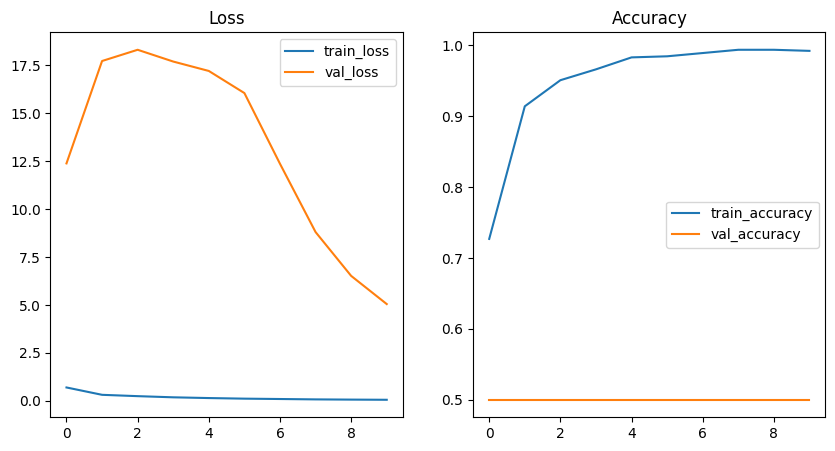

In [ ]:
plot_results([model_5_results])

In [75]:
data_augmentation = Sequential([layers.RandomFlip('horizontal_and_vertical'),
                                layers.RandomRotation(0.5),
                                layers.RandomZoom(0.2)])

In [76]:
reduce_lr = ReduceLROnPlateau(monitor='val_accuracy', factor=0.2, patience=3, min_lr=1e-6)

In [81]:
model_6 = keras.Sequential([
    data_augmentation,
    layers.Conv2D(32, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.2)),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.MaxPooling2D(),

    layers.Conv2D(64, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.1)),
    layers.BatchNormalization(),
    layers.Dropout(0.2),
    layers.MaxPooling2D(),

    layers.Conv2D(128, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.05)),
    layers.BatchNormalization(),
    layers.Dropout(0.1),
    layers.MaxPooling2D(),

    layers.Flatten(),
    layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.2)),
    layers.BatchNormalization(),
    layers.Dropout(0.2),

    layers.Dense(32, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.1),
    layers.Dense(2, activation='sigmoid')
    ])

In [85]:
model_6.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=5e-3), loss='categorical_crossentropy', metrics=['accuracy'])

In [86]:
model_6_results = model_6.fit(train_images, train_labels, epochs=20, batch_size=100, validation_data=(val_images, val_labels), callbacks=[early_stop, reduce_lr])

Epoch 1/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 10s 863ms/step - accuracy: 0.7244 - loss: 9.5611 - val_accuracy: 0.5000 - val_loss: 5.0565 - learning_rate: 0.0050
Epoch 2/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 726ms/step - accuracy: 0.7857 - loss: 4.1772 - val_accuracy: 0.5625 - val_loss: 3.3194 - learning_rate: 0.0050
Epoch 3/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 10s 721ms/step - accuracy: 0.7830 - loss: 2.9009 - val_accuracy: 0.8125 - val_loss: 2.8500 - learning_rate: 0.0050
Epoch 4/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 10s 763ms/step - accuracy: 0.7889 - loss: 2.5807 - val_accuracy: 0.5000 - val_loss: 2.8166 - learning_rate: 0.0050
Epoch 5/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 800ms/step - accuracy: 0.7923 - loss: 2.4412 - val_accuracy: 0.5000 - val_loss: 3.2266 - learning_rate: 0.0050
Epoch 6/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 10s 761ms/step - accuracy: 0.8366 - loss: 2.2898 - val_accuracy: 0.5000 - val_loss: 3.8064 - learning_rate: 0.0050
Epoch 7/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 10s 729ms/step - accuracy: 0.8438 - loss: 2.0500 - val_accur

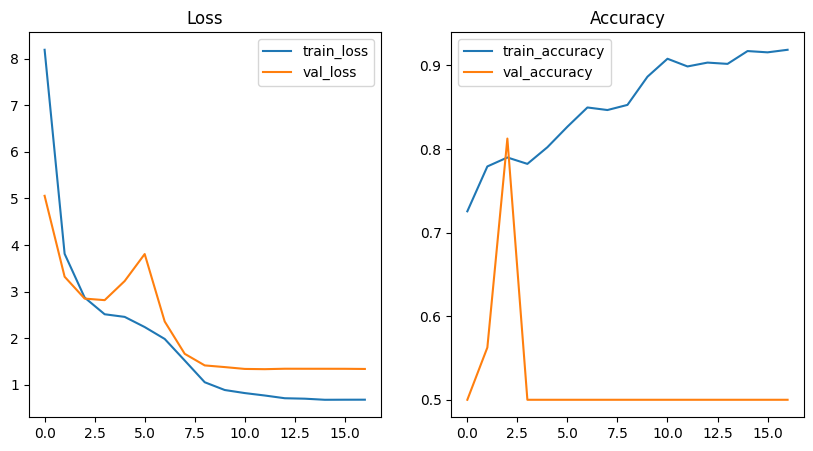

In [87]:
plot_results([model_6_results])

# Evaluation